In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
bike = pd.read_csv('../data/bicycle-hourtime-201905-test.csv', parse_dates=["대여일자"] ,encoding='cp949')
bike.head()

,대여일자,요일,요일_New,주중주말구분,대여시간,대여소번호,대여소명,지구,지구_New,거치대수,...,대여구분코드_new,성별,성별_New,연령대코드,연령대코드_New,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-05-01,수,3,0,0,101,(구)합정동 주민센터,주거,0,5,...,1,M,0,20대,2,1,37.37,0.28,1210,8
1,2019-05-01,수,3,0,0,101,(구)합정동 주민센터,주거,0,5,...,0,F,1,20대,2,1,21.88,0.2,850,9
2,2019-05-01,수,3,0,3,101,(구)합정동 주민센터,주거,0,5,...,1,M,0,20대,2,1,34.69,0.28,1200,5
3,2019-05-01,수,3,0,6,101,(구)합정동 주민센터,주거,0,5,...,1,F,1,30대,3,1,27.1,0.27,1180,7
4,2019-05-01,수,3,0,8,101,(구)합정동 주민센터,주거,0,5,...,1,F,1,20대,2,1,21.78,0.23,1000,6


In [4]:
bike.columns

Index(['대여일자', '요일', '요일_New', '주중주말구분', '대여시간', '대여소번호', '대여소명', '지구',
       '지구_New', '거치대수', '대여구분코드', '대여구분코드_new', '성별', '성별_New', '연령대코드',
       '연령대코드_New', '이용건수', '운동량', '탄소량', '이동거리', '사용시간'],
      dtype='object')

In [5]:
bike.shape

(69247, 21)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69247 entries, 0 to 69246
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   대여일자        69247 non-null  datetime64[ns]
 1   요일          69247 non-null  object        
 2   요일_New      69247 non-null  int64         
 3   주중주말구분      69247 non-null  int64         
 4   대여시간        69247 non-null  int64         
 5   대여소번호       69247 non-null  int64         
 6   대여소명        69247 non-null  object        
 7   지구          69247 non-null  object        
 8   지구_New      69247 non-null  int64         
 9   거치대수        69247 non-null  int64         
 10  대여구분코드      69247 non-null  object        
 11  대여구분코드_new  69247 non-null  int64         
 12  성별          69247 non-null  object        
 13  성별_New      69247 non-null  int64         
 14  연령대코드       69247 non-null  object        
 15  연령대코드_New   69247 non-null  int64         
 16  이용건수        69247 non-

In [7]:
bike["년"] = bike["대여일자"].dt.year
bike["월"] = bike["대여일자"].dt.month
bike["일"] = bike["대여일자"].dt.day

In [8]:
bike.shape

(69247, 24)

In [9]:
bike.describe()

,요일_New,주중주말구분,대여시간,대여소번호,지구_New,거치대수,대여구분코드_new,성별_New,연령대코드_New,이용건수,이동거리,사용시간,년,월,일
count,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.000000,69247.0,69247.0,69247.000000
mean,3.271347,0.231245,14.507979,227.411960,0.670989,14.292388,0.812310,0.412769,2.964980,1.247433,6213.248083,35.225540,2019.0,5.0,15.889295
std,1.859200,0.421632,5.942634,189.346957,0.744068,6.979036,0.390468,0.492335,1.116758,0.633802,13472.555141,38.998157,0.0,0.0,9.087982
min,0.000000,0.000000,0.000000,101.000000,0.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2019.0,5.0,1.000000
25%,2.000000,0.000000,10.000000,118.000000,0.000000,10.000000,1.000000,0.000000,2.000000,1.000000,1370.000000,9.000000,2019.0,5.0,8.000000
50%,3.000000,0.000000,16.000000,152.000000,1.000000,12.000000,1.000000,0.000000,3.000000,1.000000,2830.000000,21.000000,2019.0,5.0,16.000000
75%,5.000000,0.000000,19.000000,407.000000,1.000000,15.000000,1.000000,1.000000,4.000000,1.000000,6400.000000,48.000000,2019.0,5.0,24.000000
max,6.000000,1.000000,23.000000,3104.000000,2.000000,40.000000,1.000000,1.000000,7.000000,10.000000,255540.000000,698.000000,2019.0,5.0,31.000000


In [10]:
bike.isnull().sum()

대여일자          0
요일            0
요일_New        0
주중주말구분        0
대여시간          0
대여소번호         0
대여소명          0
지구            0
지구_New        0
거치대수          0
대여구분코드        0
대여구분코드_new    0
성별            0
성별_New        0
연령대코드         0
연령대코드_New     0
이용건수          0
운동량           0
탄소량           0
이동거리          0
사용시간          0
년             0
월             0
일             0
dtype: int64

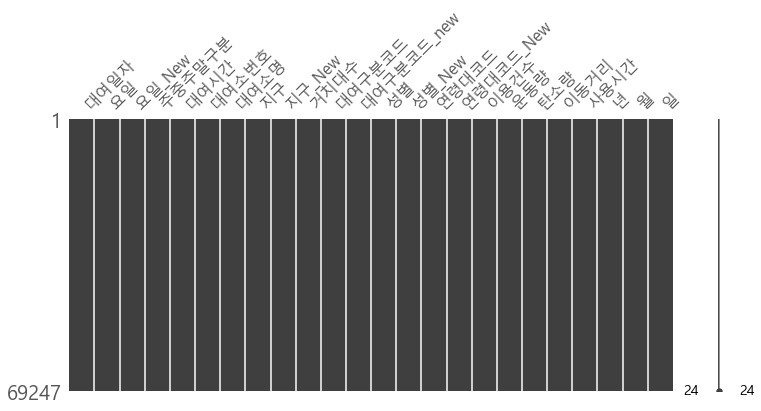

In [11]:
import missingno as msno

msno.matrix(bike, figsize=(12,5))

In [12]:
bike.head()

,대여일자,요일,요일_New,주중주말구분,대여시간,대여소번호,대여소명,지구,지구_New,거치대수,...,연령대코드,연령대코드_New,이용건수,운동량,탄소량,이동거리,사용시간,년,월,일
0,2019-05-01,수,3,0,0,101,(구)합정동 주민센터,주거,0,5,...,20대,2,1,37.37,0.28,1210,8,2019,5,1
1,2019-05-01,수,3,0,0,101,(구)합정동 주민센터,주거,0,5,...,20대,2,1,21.88,0.2,850,9,2019,5,1
2,2019-05-01,수,3,0,3,101,(구)합정동 주민센터,주거,0,5,...,20대,2,1,34.69,0.28,1200,5,2019,5,1
3,2019-05-01,수,3,0,6,101,(구)합정동 주민센터,주거,0,5,...,30대,3,1,27.1,0.27,1180,7,2019,5,1
4,2019-05-01,수,3,0,8,101,(구)합정동 주민센터,주거,0,5,...,20대,2,1,21.78,0.23,1000,6,2019,5,1
